---
title: 1.6 概率
date: 2024-2-2 14:00:00
tags: [机器学习,pytorch]
categories: [机器学习]
comment: true
toc: true
---
#
<!--more-->
# 6. 概率
## 6.1 基本概率论
### 6.1.1 一点代码
- 笼统来说，可以把分布（distribution）看作对事件的概率分配

tensor([16569., 16678., 16493., 16636., 16712., 16911.])


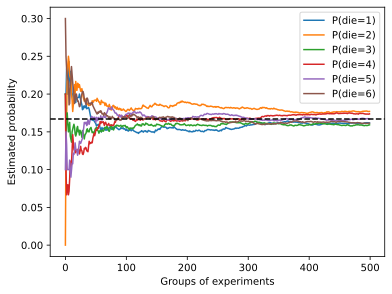

In [7]:
#一下两行代码可选，有时候会出现崩溃
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import torch
from torch.distributions import multinomial
from d2l import torch as d2l
import matplotlib.pyplot as plt

#1 抽样
fair_probs = torch.ones([6])/6 #六个数，每个数的概率都是1/6
s = multinomial.Multinomial(99999, fair_probs).sample() #抽样99999次,根据概率分布抽样，抽中的数字对应的位置为+1，其他位置为0
print(s)
#分组抽样
counts = multinomial.Multinomial(10,fair_probs).sample((500,)) #500组实验，每组抽样10个样本
cum_counts = counts.cumsum(dim=0) #累加
estimates = cum_counts/cum_counts.sum(dim=1,keepdims=True) #计算频率,第一组10个样本，计算频率；第二组10+10个，计算频率

#2 绘图 越到后面，采样越多，估计的概率越接近真实概率
d2l.set_figsize((6,4.5))
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),label=("P(die=" + str(i+1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

### 6.1.2 概率论公理
- 非负性：对于任意事件A，P(A) >= 0
- 规范性：P(Ω) = 1
- 可列可加性：对于任意两个不相容事件A和B，P(A∪B) = P(A) + P(B)
### 6.1.3 随机变量
## 6.2 处理多个随机变量
### 6.2.1 联合概率
- $P(A,B) = P(A|B)P(B)$
### 6.2.2 条件概率
- $P(A|B) = \frac{P(A,B)}{P(B)}$
### 6.2.3 贝叶斯定理
- $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$
### 6.2.4 边缘化
- $P(A) = \sum\limits_{B}P(A,B)$
- 边际化结果的概率或分布称为边际概率（marginal probability）或边际分布（marginal distribution）
### 6.2.5 独立性
- $A \perp B \Rightarrow P(A,B) = P(A)P(B)$
- $A \perp B|C \Rightarrow P(A,B|C) = P(A|C)P(B|C)$
## 6.3 期望和方差
- 期望：$E_{x\sim P}[f(x)] = \sum\limits_{x}P(x)f(x)$
- 方差：$Var(f(x)) = E[(f(x) - E[f(x)])^2] = E[f(x)^2] - E[f(x)]^2$